In [6]:
#Do the standard imports
from pandas import Series
from matplotlib import pyplot
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings("ignore")

Month
1749-01-01    58.0
1749-02-01    62.6
1749-03-01    70.0
1749-04-01    55.7
1749-05-01    85.0
Name: Sunspots, dtype: float64


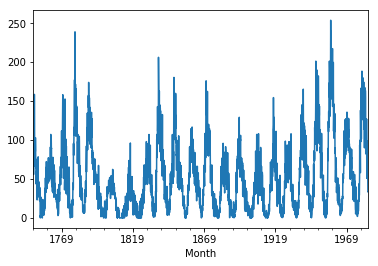

In [7]:
#Tkae a peek at your data
series=Series.from_csv("monthly-sunspots.csv",header=0)
print(series.head())
series.plot()
pyplot.show()

Observations: 2820
Training Observations: 1861
Test Observations: 959


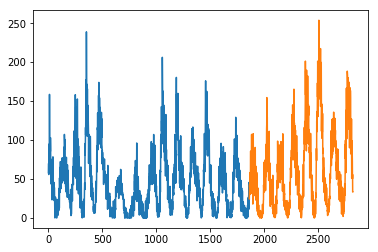

In [8]:
#Splitting the data into train and test manually
X=series.values
train_size=int(len(X)*.66)
train,test =X[0:train_size],X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d'% (len(train)))
print('Test Observations: %d' % (len(test)))
pyplot.plot(train)
pyplot.plot([None for i in train]+[x for x in test])
pyplot.show()

Observations: 1410
Training Observations: 705
Training Observations: 705
Observations: 2115
Training Observations: 1410
Training Observations: 705
Observations: 2820
Training Observations: 2115
Training Observations: 705


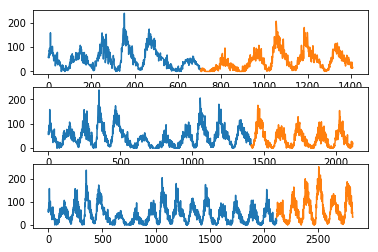

In [9]:
#Splitting TIme Series using scikit-learn
splits=TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index=1
for train_index,test_index in splits.split(X):
    train=X[train_index]
    test=X[test_index]
    print('Observations: %d' %(len(train)+len(test)))
    print('Training Observations: %d' %(len(train)))
    print('Training Observations: %d' %(len(test)))
    pyplot.subplot(310+index)
    pyplot.plot(train)
    pyplot.plot([None for i in train]+[x for x in test])
    index +=1
pyplot.show()    

In [ ]:
#Walk Forward Methodology
n_train=500
n_records=len(X)
for i in range(n_train,n_records):
    train,test=X[0:i],X[i,i+1]
    print('train=%d, test=%d'%(len(train),len(test)))    